In [3]:
# Importar paquetes
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import scipy.optimize as opt
import math
import scipy.stats as stats

In [4]:

# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_closes(tickers, start_date=None, end_date=None, freq=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Frecuencia de muestreo por defecto (freq='d')
    # Importamos paquetes necesarios
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    # Creamos DataFrame vacío de precios, con el índice de las fechas
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    # Agregamos cada uno de los precios con YahooDailyReader
    for ticker in tickers:
        df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
        closes[ticker]=df['Adj Close']
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

In [7]:
# Información
ticker= ['^GSPC'] 
start, end= '2016-8-31', '2019-08-31'

In [8]:
# Precios diarios
daily_closes = get_closes(ticker, start, end, freq='d') #d define es diario
daily_closes

,^GSPC
Date,
2016-08-31,2170.949951
2016-09-01,2170.860107
2016-09-02,2179.979980
2016-09-06,2186.479980
2016-09-07,2186.159912
2016-09-08,2181.300049
2016-09-09,2127.810059
2016-09-12,2159.040039
2016-09-13,2127.020020


In [9]:
# Gráfico de histórico de precios diarios
#daily_closes.plot(figsize=(8,6));

In [10]:
# Calcular rendimientos continuamente compuestos
daily_logret = np.log(daily_closes/daily_closes.shift()).dropna()
daily_logret

,^GSPC
Date,
2016-09-01,-0.000041
2016-09-02,0.004192
2016-09-06,0.002977
2016-09-07,-0.000146
2016-09-08,-0.002225
2016-09-09,-0.024828
2016-09-12,0.014570
2016-09-13,-0.014942
2016-09-14,-0.000588


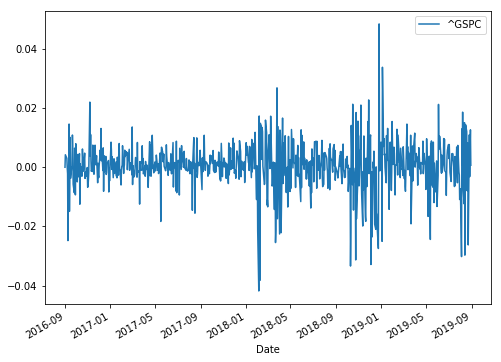

In [11]:
# Graficar...
daily_logret.plot(figsize=(8,6));

In [21]:
# Podemos resumir en un DataFrame
daily_ret_summary = pd.DataFrame(index=['Volatilidad Diaria 2016-2019'], columns=ticker)
daily_ret_summary.loc['Volatilidad Diaria 2016-2019']=daily_logret.std()
volatilidad = daily_logret.std() 
volatilidad

^GSPC    0.008136
dtype: float64

In [14]:
complete = pd.concat([daily_ret_summary, annual_ret_summary])


In [15]:
completenoindex = complete

In [16]:
mask = (daily_logret.index > '2016-01-01') & (daily_logret.index <= '2016-12-31')
closes_2016 = daily_logret.loc[mask]

# Podemos resumir en un DataFrame
daily_ret_summary_2016 = pd.DataFrame(index=['Media Diaria 2016', 'Volatilidad Diaria 2016'], columns=ticker)
daily_ret_summary_2016.loc['Media Diaria 2016']=closes_2016.mean()
daily_ret_summary_2016.loc['Volatilidad Diaria 2016']=closes_2016.std()
# Resumen en base anual
daily_ret_summary_2016.loc['Media Anual 2016']=closes_2016.mean()*252
daily_ret_summary_2016.loc['Vol 2016']=closes_2016.std()*np.sqrt(252)
#daily_ret_summary_2016

In [15]:
mask = (daily_logret.index > '2017-01-01') & (daily_logret.index <= '2017-12-31')
closes_2017 = daily_logret.loc[mask]
closes_2017

# Podemos resumir en un DataFrame
daily_ret_summary_2017 = pd.DataFrame(index=['Media Diaria 2017', 'Volatilidad Diaria 2017'], columns=ticker)
daily_ret_summary_2017.loc['Media Diaria 2017']=closes_2017.mean()
daily_ret_summary_2017.loc['Volatilidad Diaria 2017']=closes_2017.std()
# Resumen en base anual
daily_ret_summary_2017.loc['Media Anual 2017']=closes_2017.mean()*252
daily_ret_summary_2017.loc['Vol 2017']=closes_2017.std()*np.sqrt(252)
#daily_ret_summary_2017

In [16]:
mask = (daily_logret.index > '2018-01-01') & (daily_logret.index <= '2018-12-31')
closes_2018 = daily_logret.loc[mask]
closes_2018

# Podemos resumir en un DataFrame
daily_ret_summary_2018 = pd.DataFrame(index=['Media Diaria 2018', 'Volatilidad Diaria 2018'], columns=ticker)
daily_ret_summary_2018.loc['Media Diaria 2018']=closes_2018.mean()
daily_ret_summary_2018.loc['Volatilidad Diaria 2018']=closes_2018.std()
# Resumen en base anual
daily_ret_summary_2018.loc['Media Anual 2018']=closes_2018.mean()*252
daily_ret_summary_2018.loc['Vol 2018']=closes_2018.std()*np.sqrt(252)
#daily_ret_summary_2018

In [17]:
mask = (daily_logret.index > '2019-01-01') & (daily_logret.index <= '2019-03-01')
closes_2019 = daily_logret.loc[mask]
closes_2019

# Podemos resumir en un DataFramE
daily_ret_summary_2019 = pd.DataFrame(index=['Media Diaria 2019', 'Volatilidad Diaria 2019'], columns=ticker)
daily_ret_summary_2019.loc['Media Diaria 2019']=closes_2019.mean()
daily_ret_summary_2019.loc['Volatilidad Diaria 2019']=closes_2019.std()
# Resumen en base anual
daily_ret_summary_2019.loc['Media Anual 2019']=closes_2019.mean()*252
daily_ret_summary_2019.loc['Vol 2019']=closes_2019.std()*np.sqrt(252)
#daily_ret_summary_2019

In [18]:
#daily_ret_summary_2016
#daily_ret_summary_2017
#daily_ret_summary_2018
#daily_ret_summary_2019

In [19]:
daily_ret_summary_2016.reset_index(drop=True, inplace=True)
daily_ret_summary_2017.reset_index(drop=True, inplace=True)
daily_ret_summary_2018.reset_index(drop=True, inplace=True)
daily_ret_summary_2019.reset_index(drop=True, inplace=True)
complete.reset_index(drop=True, inplace=True)


In [20]:
dfGMEXICO = pd.concat([daily_ret_summary_2016.iloc[:,0:1], daily_ret_summary_2017.iloc[:,0:1], daily_ret_summary_2018.iloc[:,0:1], daily_ret_summary_2019.iloc[:,0:1], complete.iloc[:,0:1]], ignore_index=True, axis=1)
dfGRUMA = pd.concat([daily_ret_summary_2016.iloc[:,1:2], daily_ret_summary_2017.iloc[:,1:2], daily_ret_summary_2018.iloc[:,1:2], daily_ret_summary_2019.iloc[:,1:2], complete.iloc[:,1:2]], ignore_index=True, axis=1)
dfICHB = pd.concat([daily_ret_summary_2016.iloc[:,2:3], daily_ret_summary_2017.iloc[:,2:3], daily_ret_summary_2018.iloc[:,2:3], daily_ret_summary_2019.iloc[:,2:3], complete.iloc[:,2:3]], ignore_index=True, axis=1)
dfIENOVA = pd.concat([daily_ret_summary_2016.iloc[:,3:4], daily_ret_summary_2017.iloc[:,3:4], daily_ret_summary_2018.iloc[:,3:4], daily_ret_summary_2019.iloc[:,3:4], complete.iloc[:,3:4]], ignore_index=True, axis=1)
dfICAYY = pd.concat([daily_ret_summary_2016.iloc[:,4:5], daily_ret_summary_2017.iloc[:,4:5], daily_ret_summary_2018.iloc[:,4:5], daily_ret_summary_2019.iloc[:,4:5], complete.iloc[:,4:5]], ignore_index=True, axis=1)


#Renombrar indices y columnas
dfGMEXICO.rename(index={0:'Media Diaria', 1:'Volatilidad Diaria', 2:'Media Anual', 3:'Volatilidad Anual'}, columns={0:'2016', 1:'2017', 2:'2018', 3:'2019', 4:'2016-2019'}, inplace=True)
dfGRUMA.rename(index={0:'Media Diaria', 1:'Volatilidad Diaria', 2:'Media Anual', 3:'Volatilidad Anual'}, columns={0:'2016', 1:'2017', 2:'2018', 3:'2019', 4:'2016-2019'}, inplace=True)
dfICHB.rename(index={0:'Media Diaria', 1:'Volatilidad Diaria', 2:'Media Anual', 3:'Volatilidad Anual'}, columns={0:'2016', 1:'2017', 2:'2018', 3:'2019', 4:'2016-2019'}, inplace=True)
dfIENOVA.rename(index={0:'Media Diaria', 1:'Volatilidad Diaria', 2:'Media Anual', 3:'Volatilidad Anual'}, columns={0:'2016', 1:'2017', 2:'2018', 3:'2019', 4:'2016-2019'}, inplace=True)
dfICAYY.rename(index={0:'Media Diaria', 1:'Volatilidad Diaria', 2:'Media Anual', 3:'Volatilidad Anual'}, columns={0:'2016', 1:'2017', 2:'2018', 3:'2019', 4:'2016-2019'}, inplace=True)



## INICIO DE ACTIVOS

# GMEXICO

In [21]:
dfGMEXICO

,2016,2017,2018,2019,2016-2019
Media Diaria,0.00187183,0.00064463,-0.00167537,0.0044689,0.00048875
Volatilidad Diaria,0.0188261,0.0155574,0.0192354,0.0192236,0.0180359
Media Anual,0.471702,0.162447,-0.422194,1.12616,0.123165
Volatilidad Anual,0.298856,0.246967,0.305353,0.305166,0.286311


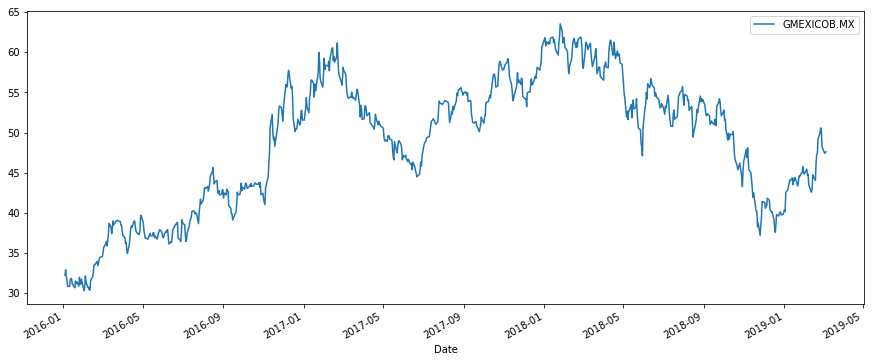

In [22]:
daily_closes.plot(figsize=(15,6), y=['GMEXICOB.MX']);

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


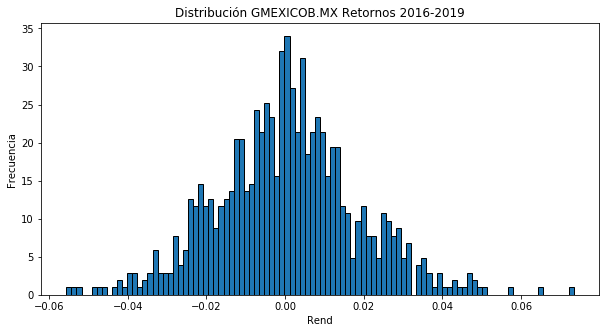

In [23]:
plt.figure(figsize=(10,5)) 
plt.hist(daily_logret['GMEXICOB.MX'], normed=True, bins=100, ec='black')
plt.xlabel('Rend');
plt.ylabel('Frecuencia');
plt.title('Distribución GMEXICOB.MX Retornos 2016-2019')
plt.show()


# GRUMA

In [24]:
dfGRUMA

,2016,2017,2018,2019,2016-2019
Media Diaria,0.000441201,-0.000149599,-0.000340955,-0.00162476,-0.000113386
Volatilidad Diaria,0.0139232,0.0137055,0.0145434,0.0120815,0.0139249
Media Anual,0.111183,-0.0376989,-0.0859207,-0.409439,-0.0285732
Volatilidad Anual,0.221025,0.217568,0.23087,0.191788,0.221051


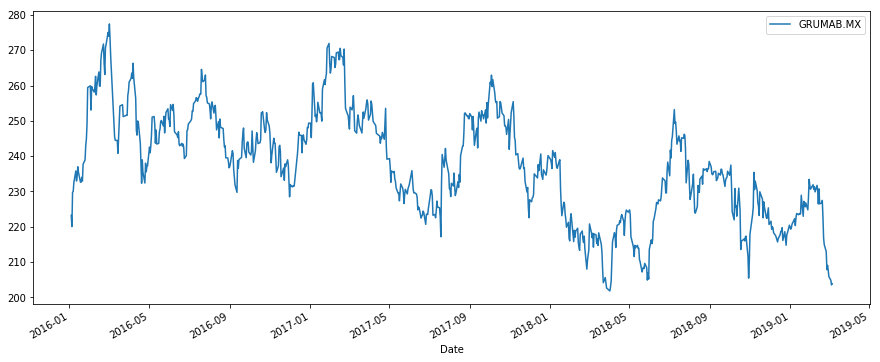

In [25]:
daily_closes.plot(figsize=(15,6), y=['GRUMAB.MX']);

Text(0.5, 1.0, 'Distribución GRUMAB.MX Retornos 2016-2019')

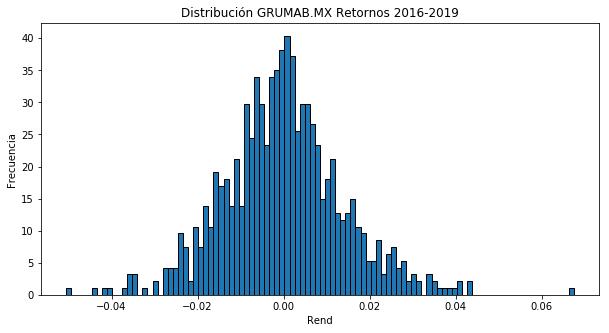

In [26]:
plt.figure(figsize=(10,5)) 
plt.hist(daily_logret['GRUMAB.MX'], normed=True, bins=100, ec='black')
plt.xlabel('Rend');
plt.ylabel('Frecuencia');
plt.title('Distribución GRUMAB.MX Retornos 2016-2019')


# INDUSTRIAS CH

In [27]:
dfICHB

,2016,2017,2018,2019,2016-2019
Media Diaria,0.00350806,-0.0018158,4.66804e-05,-0.000875963,0.0004669
Volatilidad Diaria,0.0178955,0.0145688,0.0288911,0.0231518,0.0214992
Media Anual,0.884031,-0.457582,0.0117635,-0.220743,0.117659
Volatilidad Anual,0.284083,0.231273,0.458631,0.367524,0.341289


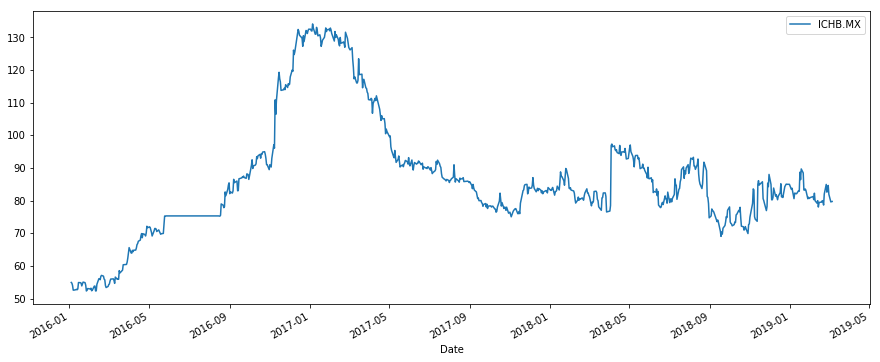

In [28]:
daily_closes.plot(figsize=(15,6), y=['ICHB.MX']);

Text(0.5, 1.0, 'Distribución ICHB.MX Retornos 2016-2019')

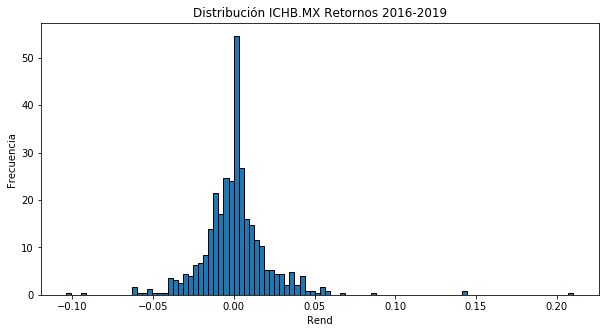

In [29]:
plt.figure(figsize=(10,5)) 
plt.hist(daily_logret['ICHB.MX'], normed=True, bins=100, ec='black')
plt.xlabel('Rend');
plt.ylabel('Frecuencia');
plt.title('Distribución ICHB.MX Retornos 2016-2019')


# IENOVA

In [30]:
dfIENOVA

,2016,2017,2018,2019,2016-2019
Media Diaria,0.000856161,0.000266513,-0.00108873,0.000223171,1.83499e-05
Volatilidad Diaria,0.0136738,0.0119021,0.0177639,0.0194877,0.0149212
Media Anual,0.215752,0.0671613,-0.27436,0.0562392,0.00462417
Volatilidad Anual,0.217065,0.188939,0.281992,0.309357,0.236867


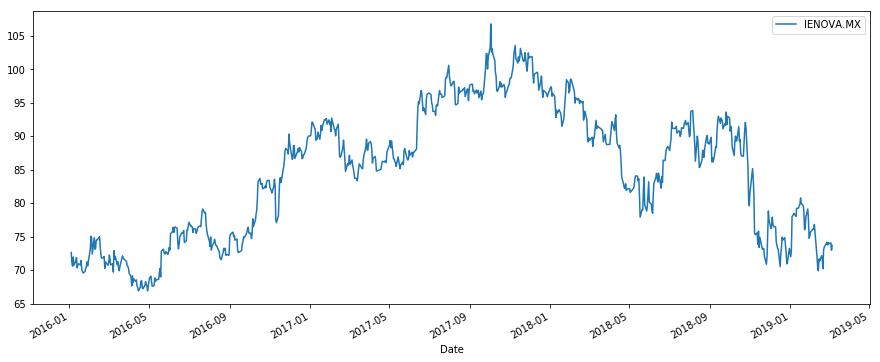

In [31]:
daily_closes.plot(figsize=(15,6), y=['IENOVA.MX']);

Text(0.5, 1.0, 'Distribución IENOVA.MX Retornos 2016-2019')

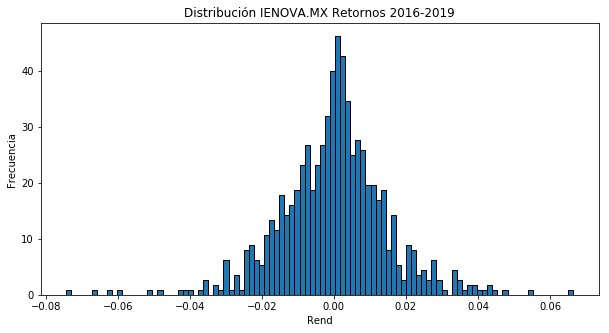

In [32]:
plt.figure(figsize=(10,5)) 
plt.hist(daily_logret['IENOVA.MX'], normed=True, bins=100, ec='black')
plt.xlabel('Rend');
plt.ylabel('Frecuencia');
plt.title('Distribución IENOVA.MX Retornos 2016-2019')


# TELEVISA

In [33]:
dfICAYY

,2016,2017,2018,2019,2016-2019
Media Diaria,-0.000257447,-0.000630338,-0.00157137,-0.00261929,-0.00101781
Volatilidad Diaria,0.0149689,0.0157106,0.019161,0.0233446,0.0171657
Media Anual,-0.0648767,-0.158845,-0.395985,-0.660062,-0.256489
Volatilidad Anual,0.237624,0.249398,0.304171,0.370584,0.272498


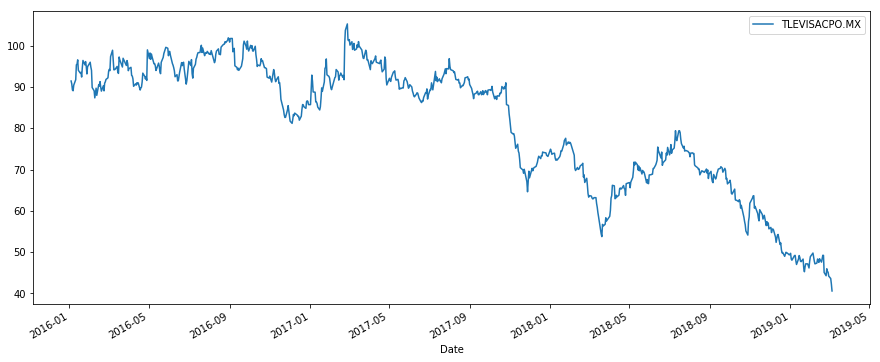

In [34]:
daily_closes.plot(figsize=(15,6), y=['TLEVISACPO.MX']);

Text(0.5, 1.0, 'Distribución Televisa Retornos 2016-2019')

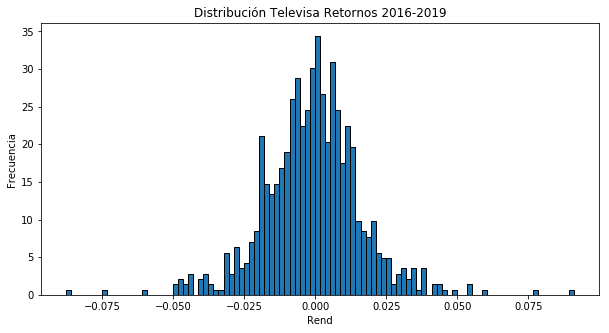

In [35]:
plt.figure(figsize=(10,5))    
plt.hist(daily_logret['TLEVISACPO.MX'], normed=True, bins=100, ec='black')
plt.xlabel('Rend');
plt.ylabel('Frecuencia');
plt.title('Distribución Televisa Retornos 2016-2019')


# RESUMEN COMPLETO

In [36]:
completenoindex

,GMEXICOB.MX,GRUMAB.MX,ICHB.MX,IENOVA.MX,TLEVISACPO.MX
0,0.00048875,-0.000113386,0.0004669,1.83499e-05,-0.00101781
1,0.0180359,0.0139249,0.0214992,0.0149212,0.0171657
2,0.123165,-0.0285732,0.117659,0.00462417,-0.256489
3,0.286311,0.221051,0.341289,0.236867,0.272498


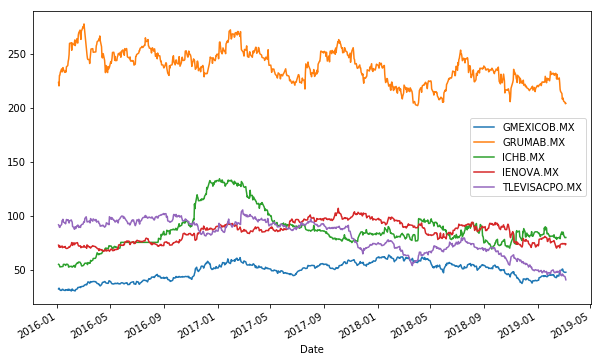

In [37]:
daily_closes.plot(figsize=(10,6));

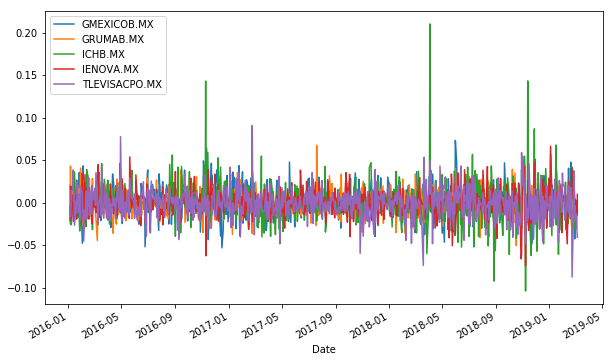

In [38]:
# Graficar...
daily_logret.plot(figsize=(10,6));

In [ ]:

complete.rename(index={0:'Media D 2016-2019', 1:'Vol D 2016-2019', 2:'Media A 2016-2019', 3:'Vol A 2016-2019'}, inplace=True)
complete

## 

In [40]:
# MATRIZ DE COVARIANZA CON RENDIMIENTOS DIARIOS
cov_matrix = daily_logret.cov()
cov_matrix

,GMEXICOB.MX,GRUMAB.MX,ICHB.MX,IENOVA.MX,TLEVISACPO.MX
GMEXICOB.MX,0.000325,0.000035,0.000070,0.000043,0.000037
GRUMAB.MX,0.000035,0.000194,0.000019,0.000029,0.000016
ICHB.MX,0.000070,0.000019,0.000462,0.000034,0.000040
IENOVA.MX,0.000043,0.000029,0.000034,0.000223,0.000017
TLEVISACPO.MX,0.000037,0.000016,0.000040,0.000017,0.000295


In [41]:
# MATRIZ DE CORRLECIÓN CON RENDIMIENTOS DIARIOS 
corr_matrix = daily_logret.corr()
corr_matrix

,GMEXICOB.MX,GRUMAB.MX,ICHB.MX,IENOVA.MX,TLEVISACPO.MX
GMEXICOB.MX,1.000000,0.139774,0.179623,0.160446,0.120205
GRUMAB.MX,0.139774,1.000000,0.064164,0.139294,0.065259
ICHB.MX,0.179623,0.064164,1.000000,0.105047,0.109213
IENOVA.MX,0.160446,0.139294,0.105047,1.000000,0.067541
TLEVISACPO.MX,0.120205,0.065259,0.109213,0.067541,1.000000


In [60]:
# MATRIZ DE COVARIANZA CON RENDIMIENTOS DIARIOS
cov_matrix = daily_logret.cov()
cov_matrix

,GMEXICOB.MX,GRUMAB.MX,ICHB.MX,IENOVA.MX,TLEVISACPO.MX
GMEXICOB.MX,0.000325,0.000035,0.000070,0.000043,0.000037
GRUMAB.MX,0.000035,0.000194,0.000019,0.000029,0.000016
ICHB.MX,0.000070,0.000019,0.000462,0.000034,0.000040
IENOVA.MX,0.000043,0.000029,0.000034,0.000223,0.000017
TLEVISACPO.MX,0.000037,0.000016,0.000040,0.000017,0.000295


In [61]:
# MATRIZ DE CORRLECIÓN CON RENDIMIENTOS DIARIOS 
corr_matrix = daily_logret.corr()
corr_matrix

,GMEXICOB.MX,GRUMAB.MX,ICHB.MX,IENOVA.MX,TLEVISACPO.MX
GMEXICOB.MX,1.000000,0.139774,0.179623,0.160446,0.120205
GRUMAB.MX,0.139774,1.000000,0.064164,0.139294,0.065259
ICHB.MX,0.179623,0.064164,1.000000,0.105047,0.109213
IENOVA.MX,0.160446,0.139294,0.105047,1.000000,0.067541
TLEVISACPO.MX,0.120205,0.065259,0.109213,0.067541,1.000000


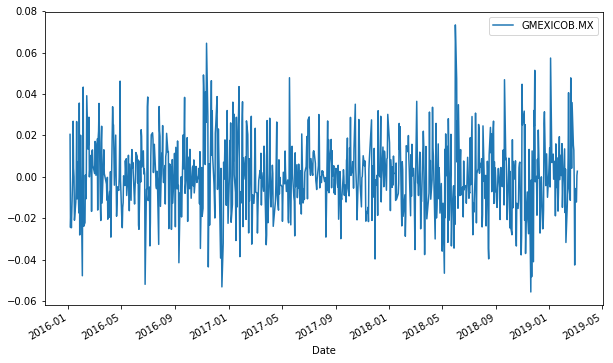

In [59]:
daily_logret[['GMEXICOB.MX']].plot(figsize=(10,6))

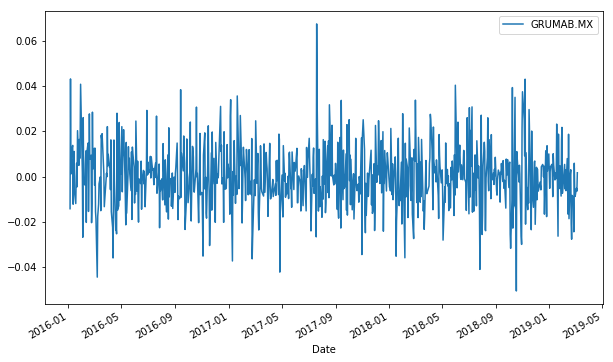

In [62]:
daily_logret[['GRUMAB.MX']].plot(figsize=(10,6))

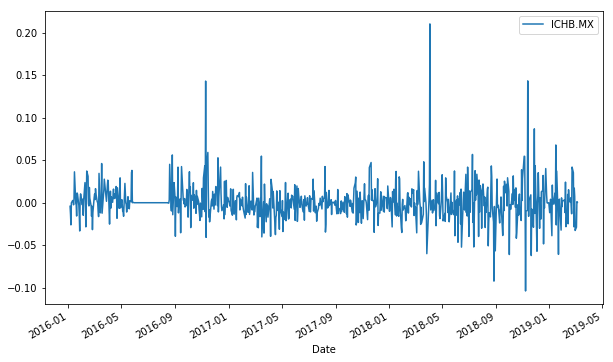

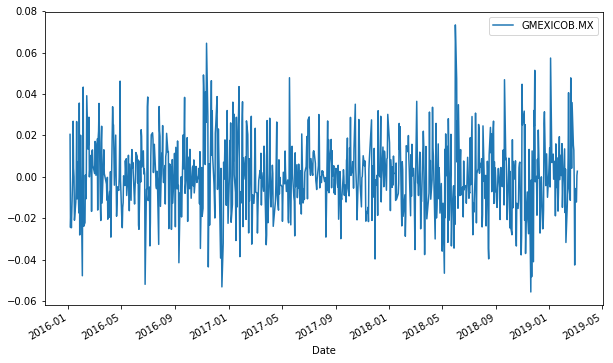

In [64]:
daily_logret[['GMEXICOB.MX']].plot(figsize=(10,6))

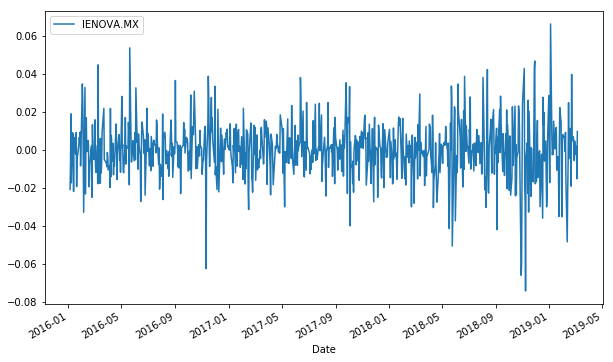

In [65]:
daily_logret[['IENOVA.MX']].plot(figsize=(10,6))

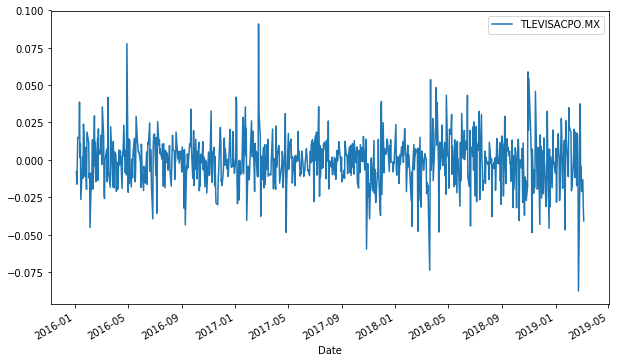

In [66]:
daily_logret[['TLEVISACPO.MX']].plot(figsize=(10,6))

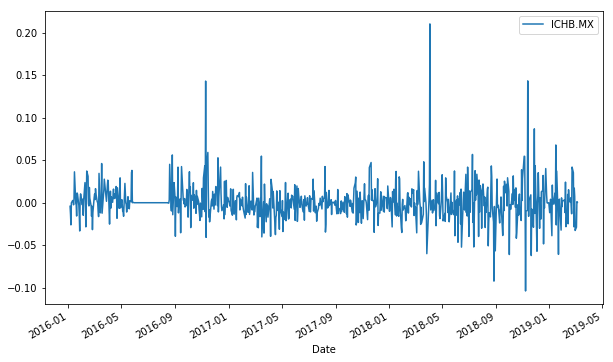

In [67]:
daily_logret[['ICHB.MX']].plot(figsize=(10,6))